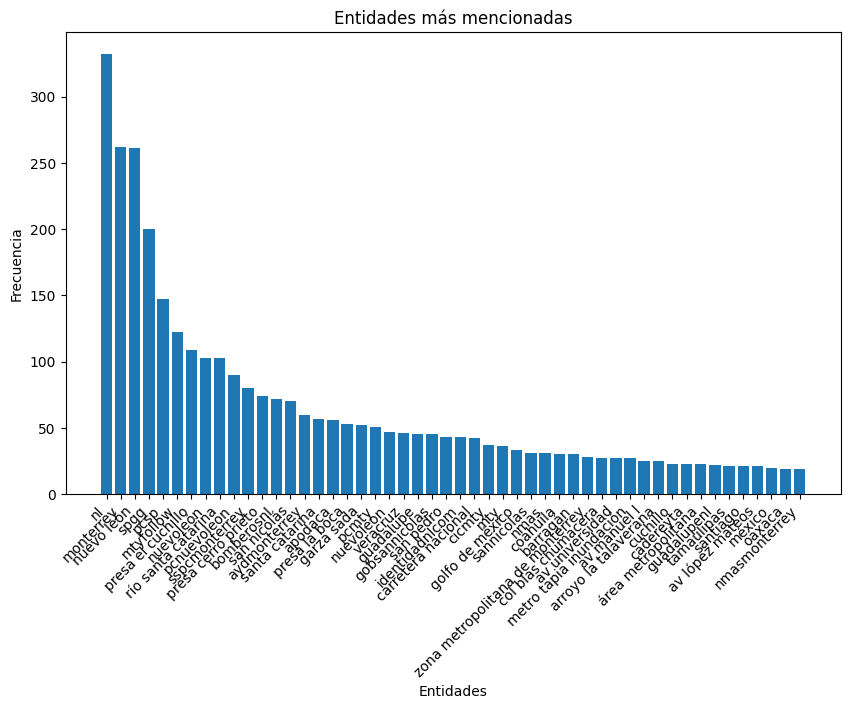

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import spacy

nlp = spacy.load("D:\home\[00]_Projects\[00]_Extracurricular\Spacy\modelV1_0_2")

df = pd.read_csv("tweets_DEF_GOD.csv")
# Inicializar un Counter para contar las entidades
ent_counter = Counter()

# Crear una lista para almacenar las entidades de cada texto
entidades_list = []

# Procesar cada texto en la columna 'Texto'
for texto in df['Texto']:
    doc = nlp(texto)
    entidades = [ent.text for ent in doc.ents]
    entidades_list.append(entidades)
    # Contar las entidades para el histograma
    for ent in doc.ents:
        ent_counter[ent.text] += 1

# Añadir la columna 'entidades' al DataFrame
df['entidades'] = entidades_list

# Guardar el DataFrame con la nueva columna en un archivo CSV
df.to_csv('df_con_entidades_TEST.csv', index=False)

# Crear un histograma con las entidades más mencionadas
most_common_ents = ent_counter.most_common(50)  
# Separar las entidades y sus frecuencias
entities, counts = zip(*most_common_ents)

# Generar el histograma
plt.figure(figsize=(10, 6))
plt.bar(entities, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Entidades más mencionadas')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()

In [2]:
import pandas as pd
from collections import Counter
import spacy

# Cargar el DataFrame
df = pd.read_csv("tweets_DEF_GOD.csv")

# Cargar el modelo de Spacy
nlp = spacy.load("D:\home\[00]_Projects\[00]_Extracurricular\Spacy\modelV1_0_2")

# Listas para almacenar las entidades con etiquetas 'COL' y 'CALLE'
colonias_detectadas = []
calles_detectadas = []

# Definir las etiquetas que quieres filtrar
etiquetas_deseadas = {'MUN', 'CALLE', 'LOC', 'GPE', 'FAC', 'COL'}

# Inicializar listas vacías para cada etiqueta específica
colonias = []
calles = []
municipios = []
locaciones = []
gpes = []
facilidades = []

# Procesar cada texto en la columna 'Texto'
for texto in df['Texto']:
    doc = nlp(texto)
    
    # Variables para almacenar la entidad encontrada por cada etiqueta
    col_value = None
    calle_value = None
    mun_value = None
    loc_value = None
    gpe_value = None
    fac_value = None

    # Iterar sobre las entidades encontradas y asignarlas a la columna correspondiente
    for ent in doc.ents:
        if ent.label_ == 'COL':
            col_value = ent.text
            colonias_detectadas.append(ent.text)
        elif ent.label_ == 'CALLE':
            calle_value = ent.text
            calles_detectadas.append(ent.text)
        elif ent.label_ == 'MUN':
            mun_value = ent.text
        elif ent.label_ == 'LOC':
            loc_value = ent.text
        elif ent.label_ == 'GPE':
            gpe_value = ent.text
        elif ent.label_ == 'FAC':
            fac_value = ent.text

    # Añadir los valores encontrados a las listas correspondientes (o None si no se encontraron)
    colonias.append(col_value)
    calles.append(calle_value)
    municipios.append(mun_value)
    locaciones.append(loc_value)
    gpes.append(gpe_value)
    facilidades.append(fac_value)

# Añadir nuevas columnas al DataFrame para cada tipo de entidad
df['colonia'] = colonias
df['calle'] = calles
df['municipio'] = municipios
df['locacion'] = locaciones
df['GPE'] = gpes
df['facilidad'] = facilidades

# Guardar el DataFrame con las nuevas columnas en un archivo CSV
df.to_csv('df_con_entidades_por_etiqueta_TEST.csv', index=False)

# Imprimir las entidades detectadas con las etiquetas COL y CALLE
print("Colonias detectadas:", colonias_detectadas)
print("Calles detectadas:", calles_detectadas)


Colonias detectadas: ['colonia bosques de la huasteca', 'colonia vista hermosa', 'col potrero anáhuac', 'colonia satélite acueducto monterrey', 'colonia arboledas de la silla guadalupe', 'colonia villas del mirador', 'col hgo jal', 'colonia ciudad ideal danielcarrillo', 'cervera del río', 'burger king', 'anáhuac nuevo león', 'colonia granja postal de sur', 'delegación margaritas', 'ciudad el transmetro', 'col blas chumacera', 'col blas chumacera', 'col blas chumacera', 'col blas chumacera', 'colonia caracol movilizó', 'col ciudad satelite mty', 'colonia nueva morelos', 'lote baldío regio', 'colonia hacienda', 'colonia villa montaña', 'colonia ébanos norte', 'col contry tesoro', 'col reforma', 'colonia fuentes del valle', 'colonia san jemo', 'colonia san jerónimo', 'colonia a la fama', 'colonia del valle', 'colonia niño artillero', 'colonia capistrana', 'colonia cosmopolis en', 'colonia cosmopolis', 'col alfonso reyes', 'colonia barrio de la industria', 'colonia riberas del río', 'colon

In [ ]:
import pandas as pd
municipios = ["Apodaca", "Monterrey", "Escobedo", "San Nicolás", "Santiago", "San Pedro Garza García", "Santa Catarina", "Guadalupe", "Saltillo", "Monte Morelos"]
coloniasMty = pd.read_csv("Colonias_Filtradas.csv")["SETT_NAME"]["geometry"]
callesMty = pd.read_csv("calles_colonias_monterrey.csv")["name"]
df_municipios = pd.DataFrame(municipios, columns=['MUN'])

base_de_datosMty = pd.DataFrame()
base_de_datosMty["CALLE"] = callesMty
base_de_datosMty["COL"] = coloniasMty
base_de_datosMty["MUN"] = df_municipios


base_de_datosMty.to_csv("DataMTY.csv", index = False)